<a href="https://colab.research.google.com/github/FilipVretenar/MUI_FKIT/blob/main/Copy_of_MUI_Seminarski_ImePrezime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metode umjetne inteligencije
### Seminarski zadatak

---
---
---


####*Zapisnik sastanka tehnologa 29.5.2018. u 9:00*

Šef proizvodne linije izvjestio je o problemima sa senzorima na transportnim cijevima:

Senzor tlaka na izlazu cjevovoda u postrojenju se pokvario. Nalazi se na ključnom dijelu sustava i zamjena neće biti moguća do sljedećeg remonta za
6 mjeseci. Međutim, **pad tlaka je kritičan parametar** jer utječe na rad pumpi, sigurnost i ekonomsku isplativost transporta fluida. Bez ovog podatka riskiramo ozbiljne probleme u radu postrojenja.

Šef proizvodnje moli jedinicu za automatizaciju i procesnu inteligenciju da pokuša na neki način doznati podatke u narednih 6 mjeseci, odnosno **pomoću dostupnih podataka naprave model koji će zamijeniti pokvareni senzor**.

Voditelj postrojenja u kvaru informirao je jedinicu da je uspio sakupiti sve podatke koje je mogao od zadnjih godinu dana, a da su relevantni za problem te su dani u **tablici MUI_1.xslx**

####*Sastanak završen 29.5.2018. u 9:45*

---
---
---

##Šef jedinice za automatizaciju i procesnu inteligenciju napravio je okvirnu proceduru u ovoj jupyter bilježnici. Tvoj je zadatak popratiti korake te razviti optimalan model koji će na osnovu ulaznih podataka predviđati izlaznu varijablu od interesa.
##Ispred sebe imaš povijesne podatke, dok je izlazna varijabla nazvana **Pad tlaka**. Na listu 2 su podaci od narednih 6 mjeseci na kojima ćeš napraviti model.predict, te spremiti rezultate u varijablu **y_SM**. Koliko dobar rezultat imaš, nećeš znati dok šef jedinice ne javi (blind_test).

---
---
---

Dvije vrste komentara:


```
# Komentari koji vas navode na pravo rješenje
''' Komentari vezani uz opcionalne korake '''
```




***Formalnosti***

U zadatku se ocjenjuju svi koraci koje ovdje odradite. Postotak preciznosti blind_testa (kojega ćete saznati kasnije) donosi dodatne bodove. Bodovi se skaliraju prema najboljem studentu.

---
---


###Unos podataka



In [29]:
!wget https://github.com/FilipVretenar/MUI_FKIT/raw/refs/heads/main/MUI_1.xlsx

--2026-01-12 13:24:35--  https://github.com/FilipVretenar/MUI_FKIT/raw/refs/heads/main/MUI_1.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FilipVretenar/MUI_FKIT/refs/heads/main/MUI_1.xlsx [following]
--2026-01-12 13:24:35--  https://raw.githubusercontent.com/FilipVretenar/MUI_FKIT/refs/heads/main/MUI_1.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7465943 (7.1M) [application/octet-stream]
Saving to: ‘MUI_1.xlsx.6’

MUI_1.xlsx.6        100%[===================>]   7.12M  --.-KB/s    in 0.1s    

2026-01-12 13:24:36 (69.7 MB/s) - ‘MUI_1.xlsx.6’ saved [7465943/7465943]



In [30]:
# nadodaj što nedostaje da se pokrene ova čelija, odnosno da se učitaju podaci
import pandas as pd
data = pd.read_excel('MUI_1.xlsx', sheet_name='Data')
blind_data = pd.read_excel('MUI_1.xlsx', sheet_name='NoviSet')

data.head(5) # provjera podataka u varijabli data

,R1,R2,O1,O2,O3,O4,O5,S1,S2,S3,S4,S5,Pad tlaka
0,120767.598959,834.709606,12.991972,1.168869,1.338166,0.054129,4.950404,-2.152366,4.822467,-1.252568,-3.042265,0.174468,0.141732
1,120305.691570,834.981886,13.058192,1.166346,1.340496,0.284724,5.062940,-1.665644,4.840839,1.652530,4.437597,0.400213,0.141775
2,120790.228015,834.084671,13.051306,1.171905,1.204256,-0.024533,5.167826,-2.642627,3.902696,0.790677,5.398728,0.117406,0.141232
3,121152.647279,835.195566,13.150003,1.165679,1.799236,0.210032,4.850992,-1.195481,8.723209,0.006461,-0.928364,0.343783,0.140671
4,120253.815734,834.713007,12.798352,1.174831,1.587587,0.124550,5.278051,-2.135823,6.787754,0.481467,6.238814,0.264650,0.140302


### Pregled podataka i odabir značajki

Ovdje provjerite:

1.   Ima li NaN vrijednosti
2.   Provedite Pearsonovu korelaciju
3.   Izradite Heat mapu korelacija
4.   Odaberite ulazne značajke te odredite X i Y

Nadopunite sljedeće čelije:

In [31]:
# Provjera NaN u datasetu data
#.isna()
print(data.isna().sum())

R1           0
R2           0
O1           0
O2           0
O3           0
O4           0
O5           0
S1           0
S2           0
S3           0
S4           0
S5           0
Pad tlaka    0
dtype: int64


In [32]:
# Pearsonova korelacija s izlaznom na cijelom datasetu data
#.corr()
Corr_all = data.corr(method = 'pearson') # method - pearson, spearman
print(Corr_all)


                 R1        R2        O1        O2        O3        O4  \
R1         1.000000 -0.755802  0.584045 -0.224601  0.127299  0.201745   
R2        -0.755802  1.000000 -0.376669  0.469814 -0.066635 -0.157658   
O1         0.584045 -0.376669  1.000000  0.018986  0.145086  0.105356   
O2        -0.224601  0.469814  0.018986  1.000000 -0.000614  0.078571   
O3         0.127299 -0.066635  0.145086 -0.000614  1.000000  0.064948   
O4         0.201745 -0.157658  0.105356  0.078571  0.064948  1.000000   
O5        -0.032541  0.000811 -0.120776  0.020915 -0.074854  0.124300   
S1         0.042717 -0.004578 -0.122143 -0.062466 -0.025711 -0.133610   
S2         0.049986 -0.046290  0.099153  0.007402  0.942553  0.113004   
S3        -0.004786  0.009079  0.001309  0.005258 -0.001412 -0.006183   
S4        -0.004497 -0.000599 -0.005049 -0.009769 -0.011990 -0.014004   
S5         0.216332 -0.149127  0.121492  0.088980  0.057749  0.952732   
Pad tlaka  0.244821 -0.589745 -0.038544 -0.194530 -

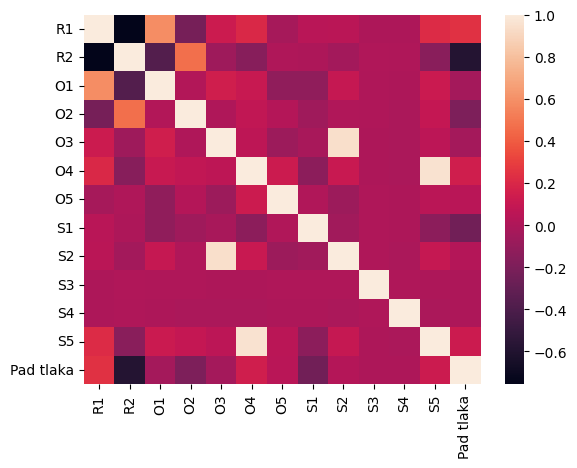

In [33]:
#Heat mapa korelacija
#matplotlib i seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Corr_all)
plt.show()

In [34]:
# definirajte X i Y # Budite sigurni da ste X i X_blind ujednačili (ako ćete izbacivati neke!)
# X - data - blind data drop() za izbacivanje značajki (ako je potrebno!) i izlazne varijable
# X_blind - blind data drop() za izbacivanje značajki (ako je potrebno!) i izlazne varijable
# Y = Pad tlaka
X = data.drop(columns=['Pad tlaka']).values
X_blind = blind_data.values
Y = data['Pad tlaka'].values




### Model development

U ovom dijelu:
1. Podijelite X i Y na trening i test skupove.
2. Trenirajte model i provjerite ga na test skupu. (Modele koje možete koristiti su **LR - linear regression, DT - decision tree regressor, NN - Neural networks**)
3. Ispišite MSE, R2 i Pearson između y_test i y_pred
4. Procijenite modelom vrijednosti za kompletni X - MSE, R2 i Pearson
5. Grafički prikažite realni Y vs Y_pred_svi
6. Procijenite modelom vrijednosti za X_blind

(Možete provjeriti sva 3 pa odabrati najbolji, a možete odabrati samo 1)


In [35]:
''' Opcionalno '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
Y_t = scaler.fit_transform(Y.reshape(-1, 1))
MMscaler = MinMaxScaler()
X_t = MMscaler.fit_transform(X)


# Skaliranje podataka - StandardScaler, MinMaxScaler

In [36]:
# podjela na trening i test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X_t, Y_t, train_size
= 0.8 , random_state=42, shuffle=True)

# sklearn train test split

In [39]:
# Treniranje modela
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
#sklearn linear regression, decision tree regressor, Keras - Sequential, Dense..
model = Sequential()
model.add(Dense(9, input_dim = 12, activation = 'tanh'))
model.add(Dense(1, activation = 'linear')) # dodavanje izlaznog sloja
model.compile(loss= 'mse', optimizer='Adam', metrics = ['mse']) # definiranje loss funkcije, algoritma učenja i evaluacija modela na treningu
es = EarlyStopping(monitor = 'val_loss', patience = 50)
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 1000,
validation_split = 0.2, callbacks=[es], ) # fitanje modela na trening
podacima
test = model.evaluate(X_test, Y_test)

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0148 - mse: 1.0148 - val_loss: 0.5839 - val_mse: 0.5839
Epoch 2/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5487 - mse: 0.5487 - val_loss: 0.4578 - val_mse: 0.4578
Epoch 3/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4421 - mse: 0.4421 - val_loss: 0.4030 - val_mse: 0.4030
Epoch 4/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3937 - mse: 0.3937 - val_loss: 0.3810 - val_mse: 0.3810
Epoch 5/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3632 - mse: 0.3632 - val_loss: 0.3501 - val_mse: 0.3501
Epoch 6/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3415 - mse: 0.3415 - val_loss: 0.3272 - val_mse: 0.3272
Epoch 7/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3267 - mse: 0.3267 - val_loss: 0.3085 - val_mse: 0.3085
Epoch 8/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2937 - mse: 0.2937 - val_loss: 0.2935 - val_mse: 0.2935
Epoch 9/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

KeyboardInterrupt: 

In [ ]:
# Provjera na test setu
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = RFRmodel.predict(X_test)
MSE = mean_squared_error(Y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test,y_pred))
MAE = mean_absolute_error(Y_test,y_pred)
R2 = r2_score(Y_test,y_pred)
print('______________________________\n')
print('Rezultati - Šuma stabala')
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('MAE: ', MAE)
print('R2: ', R2)
print('______________________________')
# mean_squared_error, r2_score, pearson
#LRmodel.predict(X_test), DTmodel.predict(X_test), ili/i NNmodel.predict(X_test)...
# mse, r2, pearson na y_test vs y_predict

In [ ]:
# provjera na cjelokupnim podacima

#LRmodel.predict(X), DTmodel.predict(X), ili/i NNmodel.predict(X)...
# mse, r2, corrcoef na Y vs y_pred_sve

In [ ]:
#grafički prikaz cjelokupnog seta

'''Ako si skalirala/o podatke prije crtanja odskalirati u realne vrijednosti!'''

#plt.plot(Y)
#plt.plot(y_pred_sve)

### Provjera na blind setu

In [ ]:
# Procjena na blind testu

''' Ako si skalirala/o podatke prilikom treninga, skaliraj i X_blind na isti način kao i X '''

#LRmodel.predict(X_blind), DTmodel.predict(X_blind), ili/i NNmodel.predict(X_blind)...


''' y_SM odskaliraj na originalnu skalu ako si sklairala/o X podatke '''

